In [2]:
# analysis of high aerosol loading during dust event (April 3, 2024)
# read High Spectra Resolution Lidar (HSRL) data using ACT

### code courtesy of Damao Zhang ###

#%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

In [4]:
act.discovery.download_arm_data?

Signature:
act.discovery.download_arm_data(
    username,
    token,
    datastream,
    startdate,
    enddate,
    time=None,
    output=None,
)
Docstring:
This tool will help users utilize the ARM Live Data Webservice to download
ARM data.

Parameters
----------
username : str
    The username to use for logging into the ADC archive.
token : str
    The access token for accessing the ADC archive.
datastream : str
    The name of the datastream to acquire.
startdate : str
    The start date of the data to acquire. Formats accepted are
    YYYY-MM-DD, DD.MM.YYYY, DD/MM/YYYY, YYYYMMDD, YYYY/MM/DD or
    any of the previous formats with THH:MM:SS added onto the end
    (ex. 2020-09-15T12:00:00).
enddate : str
    The end date of the data to acquire. Formats accepted are
    YYYY-MM-DD, DD.MM.YYYY, DD/MM/YYYY, YYYYMMDD or YYYY/MM/DD, or
    any of the previous formats with THH:MM:SS added onto the end
    (ex. 2020-09-15T13:00:00).
time: str or None
    The specific time. Format is HHMMS

[DOWNLOADING] guchsrlM1.a1.20220403.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


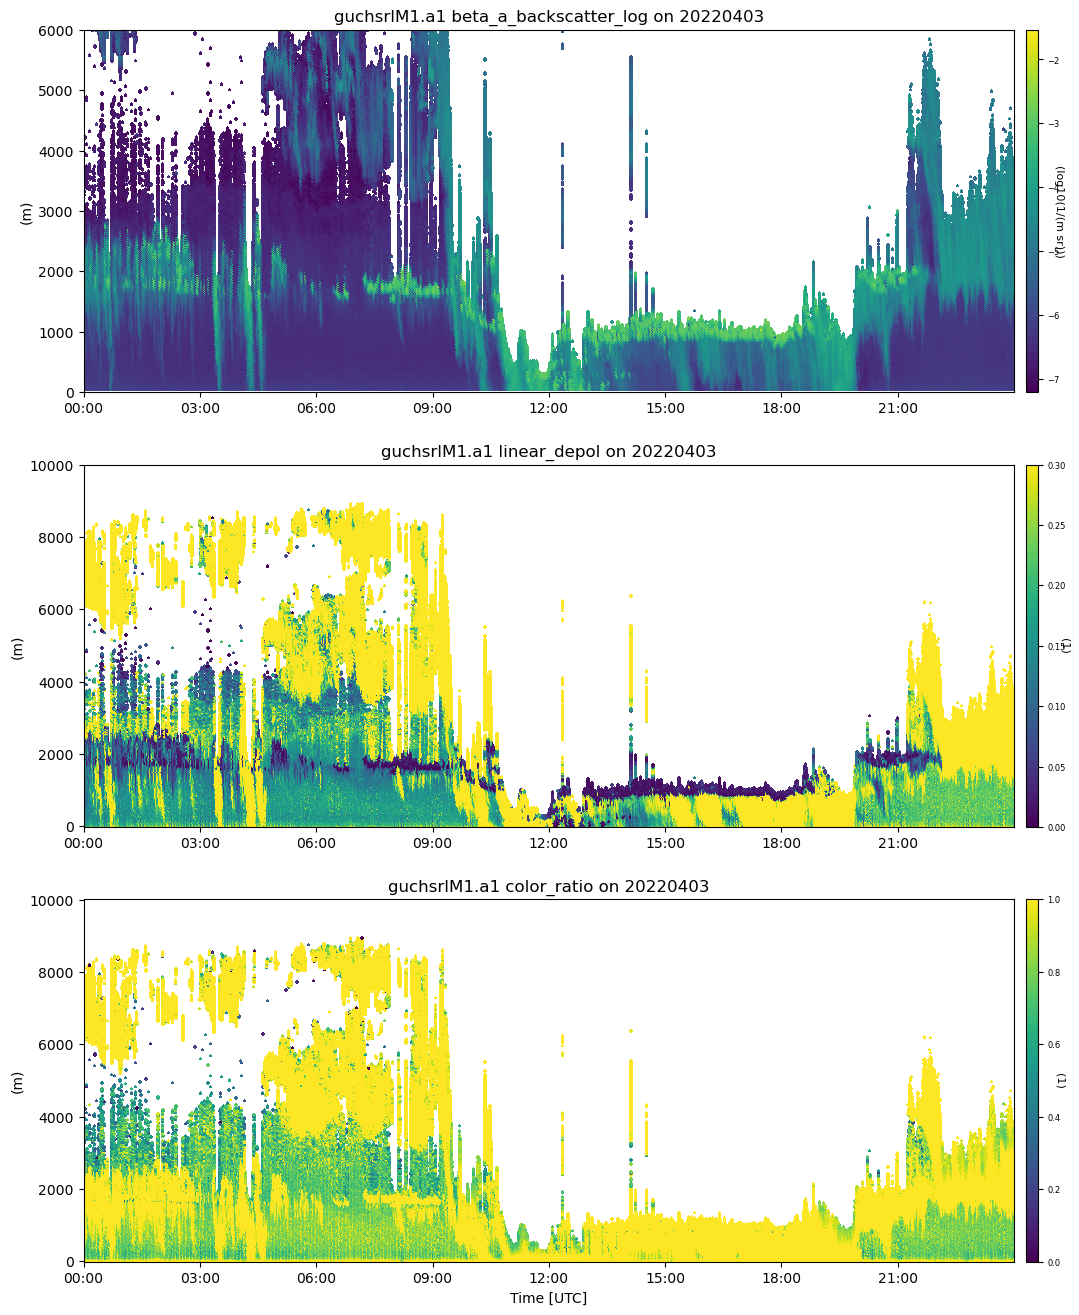

In [44]:
### April 3rd, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-3'
enddate = '2022-04-3'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

### Dust layer observations here ###

[DOWNLOADING] guchsrlM1.a1.20220404.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


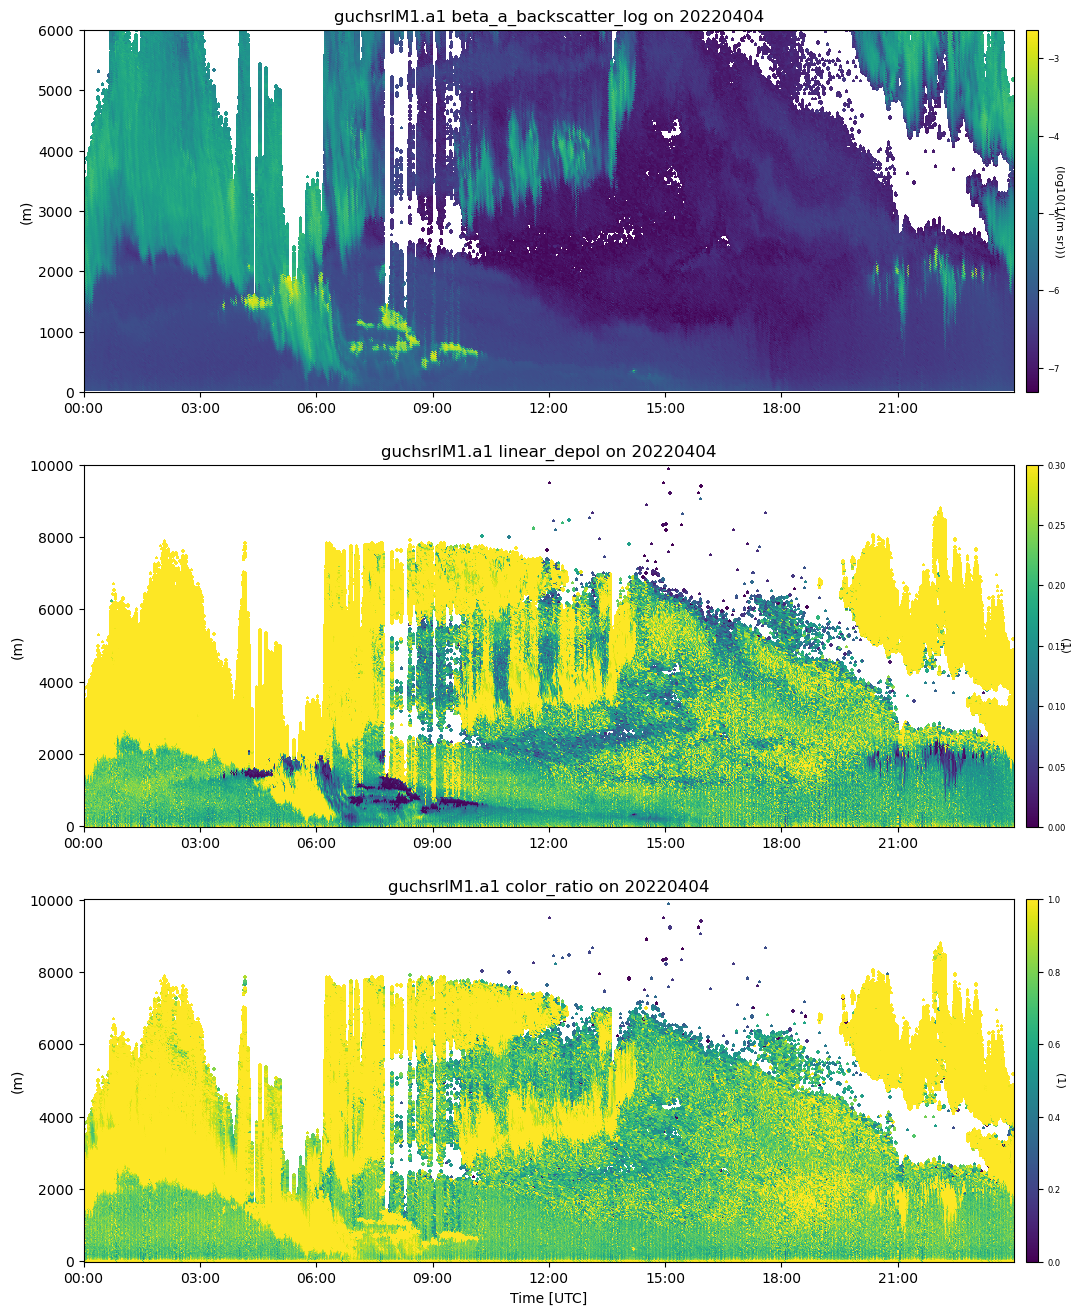

In [50]:
### April 4rd, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-4'
enddate = '2022-04-4'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

[DOWNLOADING] guchsrlM1.a1.20220405.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


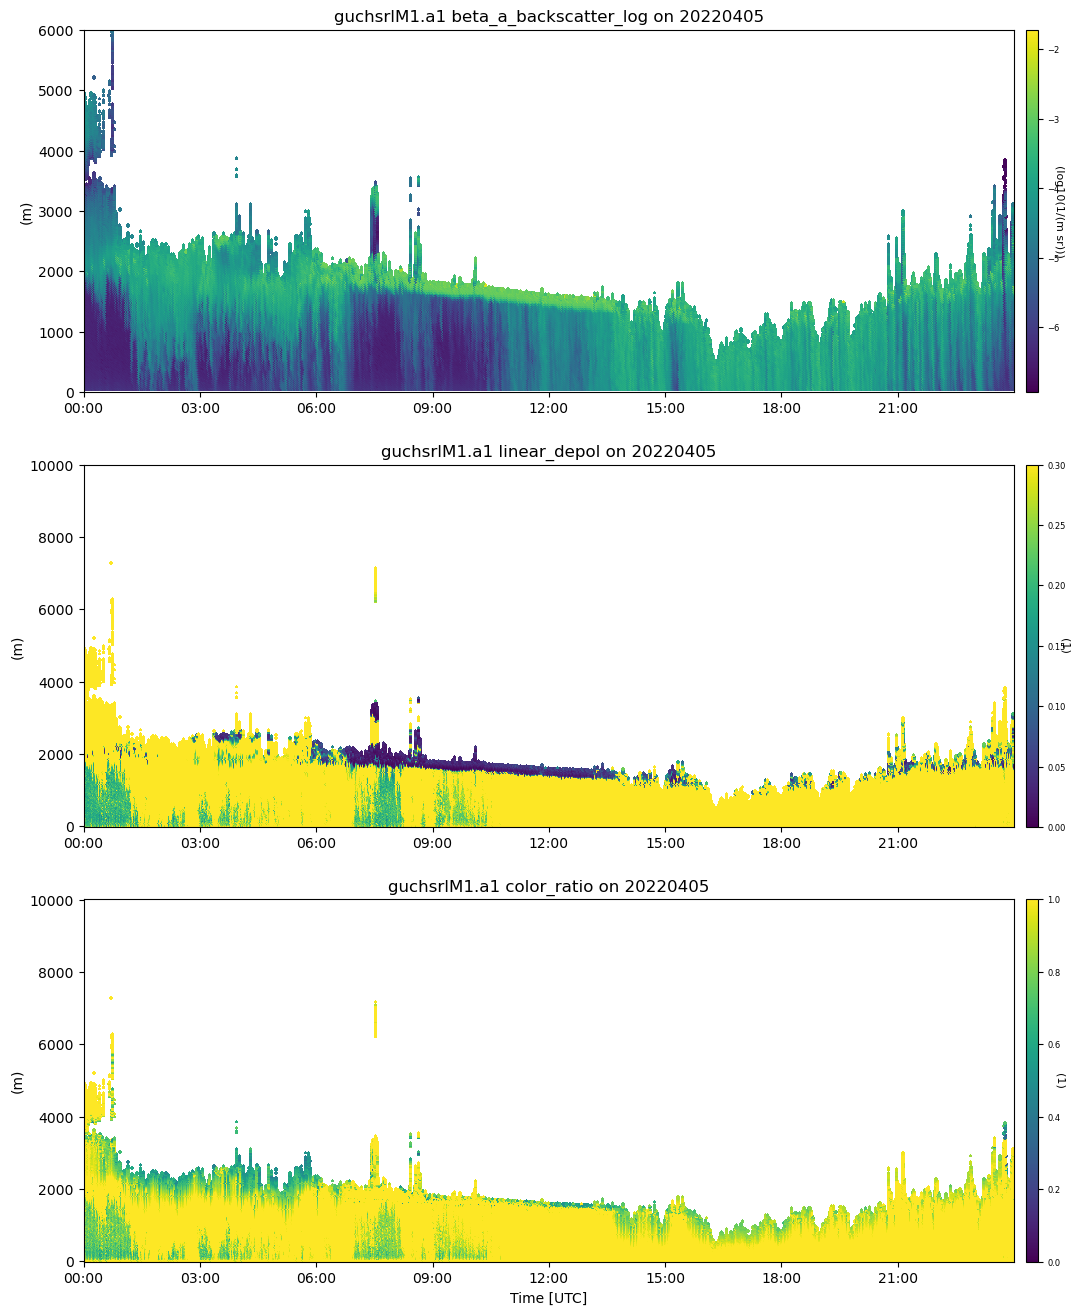

In [46]:
### April 5rd, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-5'
enddate = '2022-04-5'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

[DOWNLOADING] guchsrlM1.a1.20220406.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


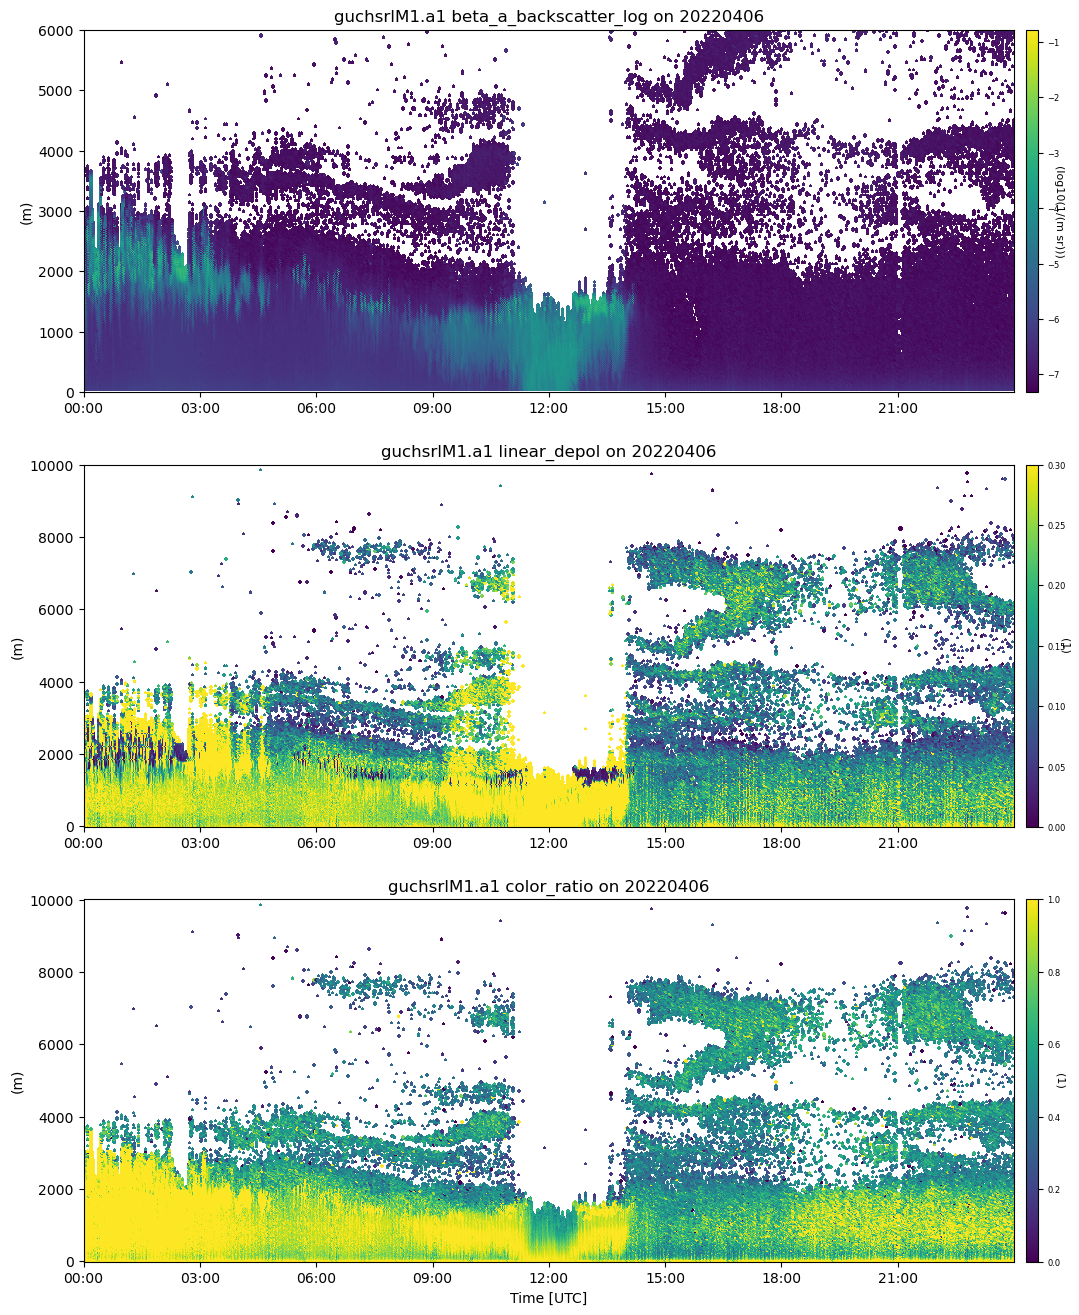

In [47]:
### April 6rd, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-6'
enddate = '2022-04-6'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

[DOWNLOADING] guchsrlM1.a1.20220407.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


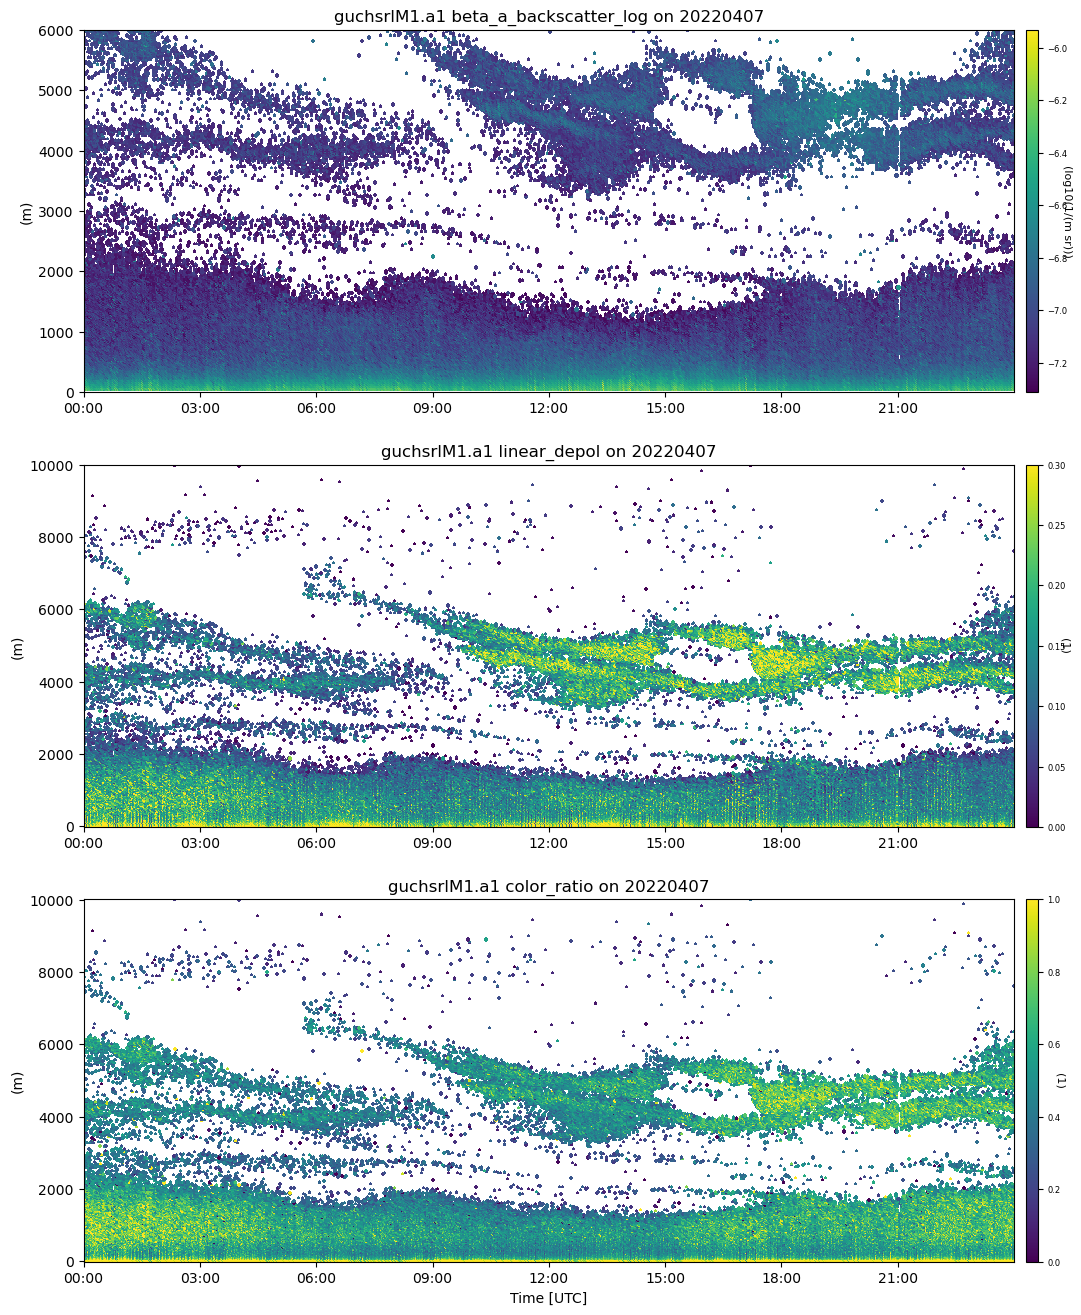

In [48]:
### April 7th, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-7'
enddate = '2022-04-7'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()

[DOWNLOADING] guchsrlM1.a1.20220408.000000.nc
[DOWNLOADING] guchsrlM1.a1.20220408.010000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


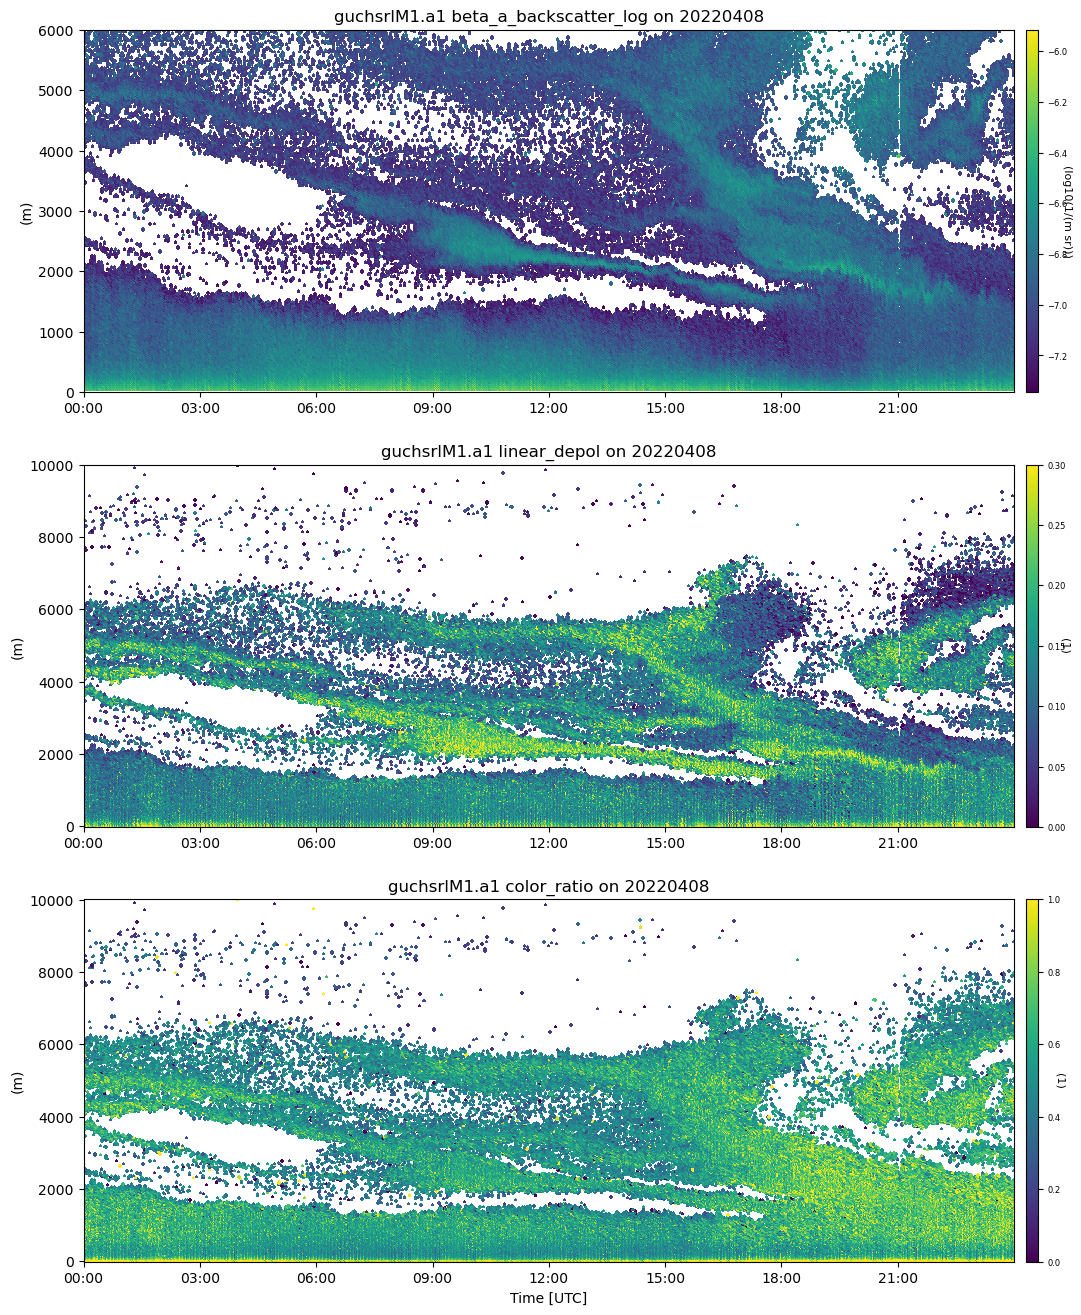

In [49]:
### April 8th, 2022 ###
# Set your username and token here!
username = 'jgasparik'
token = '61940ef60369b0bb'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2022-04-8'
enddate = '2022-04-8'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

# compute log of backscatter 
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

mask = ds['particulate_backscatter_signal_to_noise']>=3

#beta_a_backscatter - column backscatter 
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,))
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()